In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 17.3 MB/s eta 0:00:00


In [2]:
import sys
!{sys.executable} -m pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 7.0 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# import seaborn as sns
# sns.set()
mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["axes.grid"] = False
mpl.rcParams["font.size"] = 16

In [4]:
import numpy as np

In [5]:
X_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_train_pca.npy')
X_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_test_pca.npy')
y_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_train.npy')
y_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_test.npy')

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=41)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf_classifier = RandomForestClassifier(criterion='gini',max_depth=192,max_features=None,min_samples_leaf=5,min_samples_split=12,n_estimators=400,random_state=43,n_jobs = -1)

In [9]:
rf_classifier.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=192, max_features=None, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=400, n_jobs=-1,
                       random_state=43)

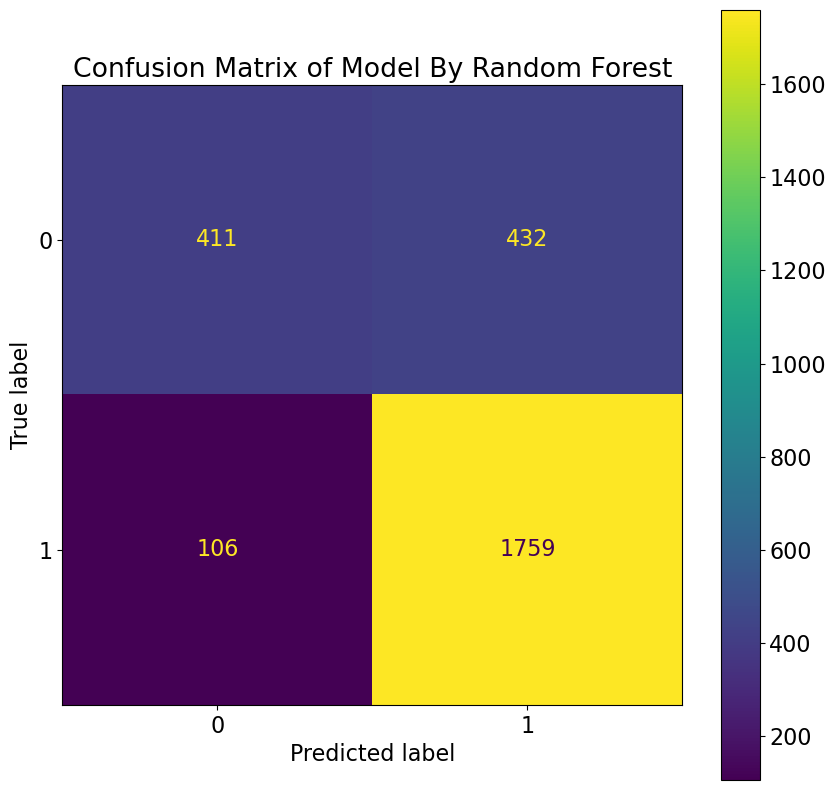

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix of Model By Random Forest')
# Save the figure as '.eps' file.
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_randomforest.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_randomforest.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/confusion_matrix_randomforest.jpg', dpi=300)  
plt.show()

In [11]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.metrics import roc_auc_score

In [12]:
y_fit = rf_classifier.fit(X_train, np.ravel(y_train))

In [13]:
#y_score = y_fit.predict_proba(X_test)[:,1]
y_score = y_fit.predict_proba(X_test)
#y_score = y_fit.predict(X_test)

In [14]:
#n_classes = np.unique(y_test).shape[0]

In [15]:
# Set the default text font size
plt.rc('font', size=20)# Set the axes title font size
plt.rc('axes', titlesize=20)# Set the axes labels font size
plt.rc('axes', labelsize=20)# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)# Set the legend font size
plt.rc('legend', fontsize=17)# Set the font size of the figure title
plt.rc('figure', titlesize=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


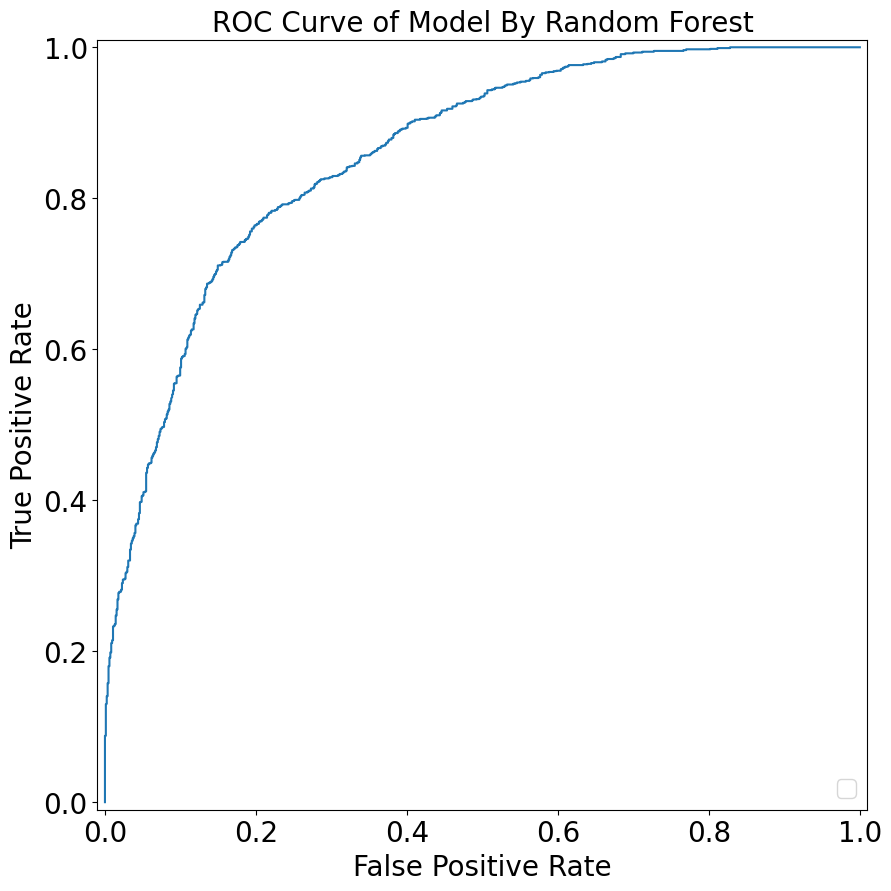

In [16]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=rf_classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#plt.legend(loc="lower right")
plt.title('ROC Curve of Model By Random Forest')
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_randomforest.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_randomforest.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/roc_curve_randomforest.jpg', dpi=300)
plt.show()

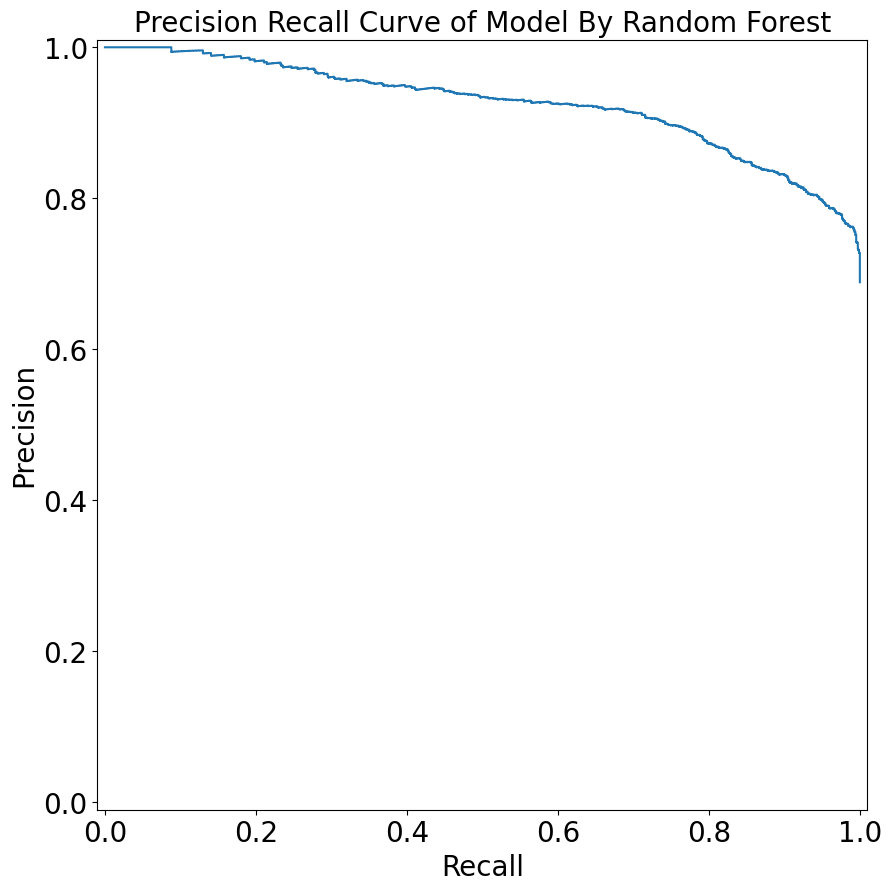

In [17]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

#prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=rf_classifier.classes_[1])
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=None)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision Recall Curve of Model By Random Forest')
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_randomforest.pdf', format='pdf', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_randomforest.eps', format='eps', dpi=300)
plt.savefig('/home/idies/workspace/Storage/s.hossain18/Permanent/Figures/precall_curve_randomforest.jpg', dpi=300)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scores_randomforest_accuracy = cross_val_score(rf_classifier,X_test,np.ravel(y_test),cv=cv,scoring='accuracy',n_jobs=-1)

In [20]:
print('Random Forest accuracy',scores_randomforest_accuracy.mean())

Random Forest accuracy 0.7926863468634687


In [21]:
from sklearn.metrics import precision_score, make_scorer

In [22]:
precision = make_scorer(precision_score,average='weighted')

In [23]:
scores_randomforest_precision = cross_val_score(rf_classifier,X_test,np.ravel(y_test),cv=cv,scoring=precision,n_jobs=-1)

In [24]:
print('Random Forest precision',scores_randomforest_precision.mean())

Random Forest precision 0.7945019668054201


In [25]:
from sklearn.metrics import recall_score

In [26]:
recall = make_scorer(recall_score,average='weighted')

In [27]:
scores_randomforest_recall = cross_val_score(rf_classifier,X_test,np.ravel(y_test),cv=cv,scoring=recall,n_jobs=-1)

In [28]:
print('Random Forest recall',scores_randomforest_recall.mean())

Random Forest recall 0.7926863468634687


In [29]:
scores_randomforest_f1 = cross_val_score(rf_classifier,X_test,np.ravel(y_test),cv=cv,scoring='f1_weighted',n_jobs=-1)

In [30]:
print('Random Forest f1',scores_randomforest_f1.mean())

Random Forest f1 0.7724843083573661


In [31]:
scores_randomforest_auc = cross_val_score(rf_classifier,X_test,np.ravel(y_test),cv=cv,scoring='roc_auc',n_jobs=-1)

In [32]:
print('Random Forest auc',scores_randomforest_auc.mean())

Random Forest auc 0.8458685924027479
